# Разработка моделей МО для молочного хозяйства «Вольный луг»

**Описание проекта:**
   
   В компанию обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. «ЭкоФерма» готова предоставить подробные данные о своих коровах. 
   
**Цель бизнеса:** отобрать коров так, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по критериям фермера.

**Задача проекта:** создать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. Необходимо создать две прогнозные модели для отбора бурёнок в поголовье одну модель для отбора: 
1. Модель №1 будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Модель №2 будет рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью созданных моделей нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

Работать мы будем с тремя датасетами:
- `ferma_main.csv` - данные о стаде фермера на текущий момент
- `ferma_dad.csv` - данные об именах папы каждой коровы в стаде фермера
- `cow_buy.csv` - данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

**Этапы работы:**
1. ***Загрузка данных***:
- импорт необходимых библиотек и инструментов;
- загрузка и описание датасета ferma_main.csv;
- загрузка и описание датасета ferma_dad.csv;
- загрузка и описание датасета cow_buy.csv;
- загрузка данных: выводы.

2. ***Предобработка данных***:
- работа с пропусками и дубликатами;
- работа с типами данных;
- предобработка данных: выводы. 

3. ***Исследовательский анализ данных***:
- исследовательский анализ данных: датасет ferma;
- исследовательский анализ данных: датасет dad;
- исследовательский анализ данных: датасет cow_buy;
- исследовательский анализ данных: выводы.

4. ***Корреляционный анализ***:
- матрица корреляции количественных признаков;
- диаграммы рассеяния: корреляция между удоем и количественными признаками:
     - с учетом породы;
     - с учетом типа пастбища;
     - с учетом возраста;
- диаграммы рассеяния: корреляция между вкусом и количественными признаками:
    - с учетом породы;
    - с учетом типа пастбища;
    - с учетом возраста;
- корреляционный анализ: выводы.

5. ***Обучение модели линейной регрессии***:
- модель №1: подготовка данных, обучение модели, оценка качества модели
- модель №2: добавление новых параметров: СПО и ЭКЕ, подготовка данных, обучение модели, оценка качества модели
- модель №3: добавление нового параметра: Имя Папы, подготовка данных, обучение модели, оценка качества модели
- сравнение и оценка качества трех моделей: выбор лучшей:
    - сравнение качества моделей по R² и остаткам;
    - оценка качества моделей по трём метрикам: MSE, MAE, RMSE;
    - выбор лучшей модели и доверительный интервал;
- прогнозирование удоя коров ЭкоФермы.

6. ***Обучение модели логистической регрессии***: 
- подготовка данных, обучение модели, оценка качества и регулировка порога;
- прогнозирование вкуса молока коров Экофермы.

7. ***Итоговые выводы***:
- прогнозы по вкусу молока и удою у коров Экофермы;
- отбор коров;
- выводы о работе моделей.

## Загрузка данных

In [1]:
#сразу импортируем библиотеки, которые могут нам понадобиться 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.impute import SimpleImputer

### Загрузка и описание датасета ferma_main.csv

In [2]:
#открываем датасет и смотрим общую информацию
ferma = pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
display(ferma.head())
display(ferma.info())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

**Комментарий:** Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Датасет имеет необходимую для решения поставленной задачи информацию: есть информация об удое, вкусе молока и представлены с большой вероятностью коррелирующие с ними другие входные данные. В датасете явно есть проблема с типами данных, их мы решим на этапе предобработки. На данном этапе мы скорректируем оформление данных. 

Признаки в датасете `ferma_main.csv` можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

In [3]:
#меняем текущее название столбцов и оформляем по стандарту
ferma = ferma.rename(columns={
    'Удой, кг':'milk_yield_kg', 
    'ЭКЕ (Энергетическая кормовая единица)':'eke', 
    'Сырой протеин, г': 'protein_gram', 
    'СПО (Сахаро-протеиновое соотношение)':'spo', 
    'Порода':'breed', 
    'Тип пастбища':'type_of_pasture',
    'порода папы_быка':'breed_dad_bull', 
    'Жирность,%':'fat_proc', 
    'Белок,%':'protein_proc', 
    'Вкус молока':'taste', 
    'Возраст':'age'
}
           ) 

ferma.head()

,id,milk_yield_kg,eke,protein_gram,spo,breed,type_of_pasture,breed_dad_bull,fat_proc,protein_proc,taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
#меняем регистр для названий типа пастбищ: так соотношение с другими датасетами будет более корректным
ferma['type_of_pasture'] = ferma['type_of_pasture'].str.lower() 

### Загрузка и описание датасета ferma_dad.csv

In [5]:
#открываем датасет и смотрим общую информацию
dad = pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
display(dad.head(5))
display(dad.info())

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

**Комментарий**: Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

На данном этапе не совсем ясно, как данный датасет сможет помочь в решении задачи (только если речь идет о генетической предрасположенности), но его мы не убираем, возможно, в дальнейшей работе он пригодится. С типами данных проблем нет, скорректируем оформление. 

In [6]:
#меняем текущее название столбцов и оформляем по стандарту
dad = dad.rename(columns={'Имя Папы':'dad_name'})
dad.head()

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


### Загрузка и описание датасета cow_buy.csv

In [7]:
#открываем датасет и смотрим общую информацию
cow_buy = pd.read_csv('/datasets/cow_buy.csv', delimiter=';')
display(cow_buy)
display(cow_buy.info())

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

**Комментарий:** Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Датасет имеет необходимую для решения поставленной задачи информацию: представлены с большой вероятностью коррелирующие с целевыми признаками (удой, вкус) другие входные данные, которые есть в датасете ferma (порода, тип пастбища, возраст, жирность, содержание белка). В датасете cow_buy явно есть проблема с типами данных, их мы решим на этапе предобработки.  На данном этапе мы скорректируем оформление данных.

In [8]:
#меняем текущее название столбцов и оформляем по стандарту
cow_buy = cow_buy.rename(columns={
    'Порода':'breed', 
    'Тип пастбища':'type_of_pasture',
    'порода папы_быка':'breed_dad_bull',
    'Имя_папы':'dad_name',
    'Текущая_жирность,%':'fat_proc', 
    'Текущий_уровень_белок,%':'protein_proc', 
    'Возраст':'age'
}
           ) 

cow_buy.head()

,breed,type_of_pasture,breed_dad_bull,dad_name,fat_proc,protein_proc,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей:
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать.

### Загрузка данных: выводы

На данном этапе работы мы:   
- импортировали необходимые для работы библиотеки;
- загрузили в читаемом виде и просмотрели все три имеющихся у нас датасета:
    - ferma (`ferma_main.csv`) - данные о стаде фермера на текущий момент;
    - dad (`ferma_dad.csv`) - данные об именах папы каждой коровы в стаде фермера;
    - cow_buy (`cow_buy.csv`) - данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой;
- изучили общую информацию о датасетах и описали данные - данные подходят для анализа и построения моделей МО;
- выявили и устранили проблемы с форматированием, изменили оформление названий столбцов на стандартное;
- изменили регистр для названий типа пастбищ: так соотношение с другими датасетами будет более корректным.

##  Предобработка данных

### Работа с пропусками и дубликатами

In [9]:
#создаем функцию для проверки датасетов на пропуски и дубликаты
def check_datasets(ferma, dad, cow_buy):
    def check_dataset(df, name):
        print(f"Проверка датасета {name}:")
        # Проверка на наличие пропусков
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f"- Пропущенные значения: {missing_values}")
        else:
            print("- Пропущенных значений нет")
        
        # Проверка на наличие дубликатов
        duplicates = df.duplicated().sum()
        if duplicates > 0:
            print(f"- Дубликаты: {duplicates}")
        else:
            print("- Дубликатов нет")
        
        print()
    
    check_dataset(ferma, "ferma")
    check_dataset(dad, "dad")
    check_dataset(cow_buy, "cow_buy")

check_datasets(ferma, dad, cow_buy)

Проверка датасета ferma:
- Пропущенных значений нет
- Дубликаты: 5

Проверка датасета dad:
- Пропущенных значений нет
- Дубликатов нет

Проверка датасета cow_buy:
- Пропущенных значений нет
- Дубликаты: 4



In [10]:
#удаляем явные дубликаты в датасете ferma
ferma = ferma.drop_duplicates()

In [11]:
#проверяем неявные дубликаты в значениях типа пастбища
display(ferma['type_of_pasture'].unique())
display(cow_buy['type_of_pasture'].unique())

array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

In [12]:
#проверяем неявные дубликаты в значениях "отцовских" пород
display(ferma['breed_dad_bull'].unique())
display(cow_buy['breed_dad_bull'].unique())

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

In [13]:
#убираем неявные дубликаты
ferma['type_of_pasture'] = ferma['type_of_pasture'].replace({
    'равнинные': 'равнинное'
})
ferma['breed_dad_bull'] = ferma['breed_dad_bull'].replace({
    'Айдиалл': 'Айдиал'
})
display(ferma['type_of_pasture'].unique())
display(ferma['breed_dad_bull'].unique())

array(['равнинное', 'холмистое'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

**Комментарий:** в датасетах не выявлено пропущенных значений, но найдены и удалены явные дубликаты в датасете ferma (5 штук) и оставлены 4 в датасете cow_buy, так как это фиксированный список коров, так что, возможно, это не дубли-ошибки, а просто действительно повторяющиеся значения, что может быть важно для дальнейшего анализа (вводных данных и так мало, 20 позиций). В качестве неявных дубликатов были убраны различия в названии типа пастбища: "равнинное" и "равнинные", а также значения в отцовских породах "Айдиалл" и "Айдиал", приведены к единому виду с данными в таблице cow_buy.

### Работа с типами данных

В датасетах `ferma` и `cow_buy` есть явные проблемы с типом данных. В датасете `ferma` необходимо изменить следующее:
- `eke`: object поменять на float (вещественное число)
- `spo`: object поменять на float (вещественное число: представляет отношение)
- `fat_proc`: object поменять на float (вещественное число: представляет процентное содержание)
- `protein_proc`: object поменять на float (вещественное число: представляет процентное содержание)

В датасете `cow_buy` требуют замены типа следующие данные:
- `fat_proc`: object поменять на float (вещественное число: представляет процентное содержание)
- `protein_proc`: object поменять на float (вещественное число: представляет процентное содержание)

In [14]:
#заменяем типы данных в датасете ferma
ferma['eke'] = ferma['eke'].str.replace(',', '.').dropna().astype('float')
ferma['spo'] = ferma['spo'].str.replace(',', '.').dropna().astype('float')
ferma['fat_proc'] = ferma['fat_proc'].str.replace(',', '.').dropna().astype('float')
ferma['protein_proc'] = ferma['protein_proc'].str.replace(',', '.').dropna().astype('float')

#заменяем типы данных в датасете cow_buy
cow_buy['fat_proc'] = cow_buy['fat_proc'].str.replace(',', '.').dropna().astype('float')
cow_buy['protein_proc'] = cow_buy['protein_proc'].str.replace(',', '.').dropna().astype('float')

In [15]:
#проверяем, что тип данных корректно заменился
display(ferma.info())
display(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               629 non-null    int64  
 1   milk_yield_kg    629 non-null    int64  
 2   eke              629 non-null    float64
 3   protein_gram     629 non-null    int64  
 4   spo              629 non-null    float64
 5   breed            629 non-null    object 
 6   type_of_pasture  629 non-null    object 
 7   breed_dad_bull   629 non-null    object 
 8   fat_proc         629 non-null    float64
 9   protein_proc     629 non-null    float64
 10  taste            629 non-null    object 
 11  age              629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   type_of_pasture  20 non-null     object 
 2   breed_dad_bull   20 non-null     object 
 3   dad_name         20 non-null     object 
 4   fat_proc         20 non-null     float64
 5   protein_proc     20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

### Предобработка данных: выводы

На данном этапе работы мы:
- проверили датасет на пропуски и дубликаты: пропущенных значений выявлено не было, но найдены и удалены явные дубликаты в датасете ferma (5 штук), но оставлены 4 в датасете cow_buy, так как это с большой вероятностью не дубли-ошибки, а просто действительно повторяющиеся значения;
- в качестве неявных дубликатов были убраны различия в названии типа пастбища: "равнинное" и "равнинные", а также значения в отцовских породах "Айдиалл" и "Айдиал", приведены к единому виду с данными в таблице cow_buy.
- исправили в датасетах ferma и cow_buy тип данных: некорректный object сменили на корректный float.

Теперь данные готовы для исследовательского анализа.

## Исследовательский анализ данных

На данном этапе для каждого признака во всех трёх датасетах мы:
- проведем статистический анализ;
- построим графики для каждого признака (с учетом типа признака: количественный или категориальный);
- сделаем выводы о данных: есть ли вы выбросы, необычное распределение количественных признаков или другие особенности;
- выясним, как можно улучшить данные.

In [16]:
#создаем функцию для описательной статистики и построения графика по конкретному столбцу датасета
def plot_column(data, column):
    if column not in data.columns:
        print(f"Столбец '{column}' не найден в датасете.")
        return
    
    print(f"Описательная статистика для столбца: {column}")
    print(data[column].describe(), "\n")
    
    plt.figure(figsize=(10, 5))
    
    #если столбец числовой, строим гистограмму и коробчатую диаграмму
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=20)
        plt.title(f'Распределение: {column}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Боксплот: {column}')
    
    #если столбец категориальный, строим столбчатую диаграмму
    else:
        values_counts = data[column].value_counts()
        plt.pie(values_counts, labels=values_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Категории: {column}')
        plt.axis('equal')

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных: датасет ferma

Описательная статистика для столбца: milk_yield_kg
count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield_kg, dtype: float64 



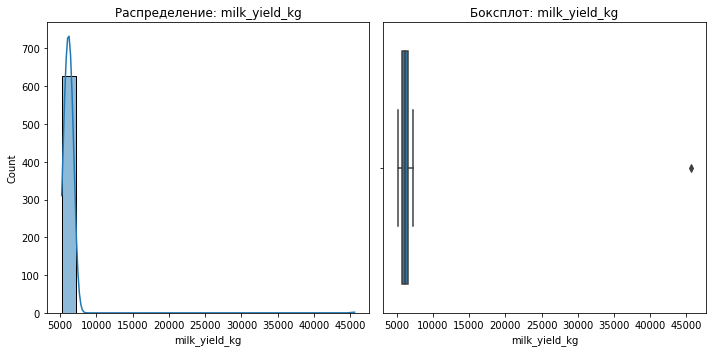

In [17]:
plot_column(ferma, 'milk_yield_kg') #применяем функцию на столбце 'milk_yield_kg'

**Комментарий:** Явно есть выброс, нереалистичное значение, которое портит статистику, его уберем.

Описательная статистика для столбца: milk_yield_kg
count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield_kg, dtype: float64 



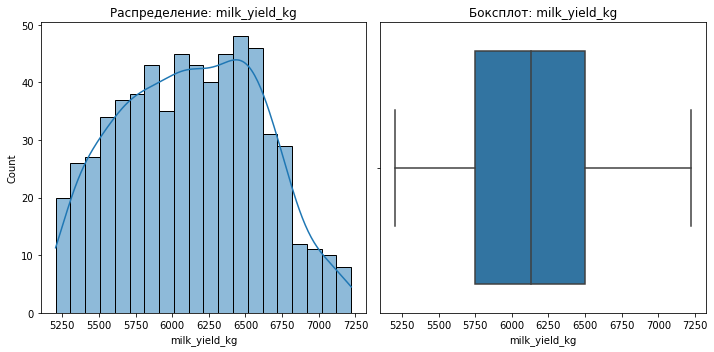

In [18]:
ferma = ferma[ferma['milk_yield_kg'] < 8000] #убираем выбросы, исходя из показателей медианы и квартилей
plot_column(ferma, 'milk_yield_kg')

**Комментарий:** Так картина выглядит гораздо более реалистично. В среднем удой молока у коровы фермы "Вольный луг" около 6,1 кг, это же и медиана. Минимум - 5,2 кг, максимум - 7,2 кг. 

Описательная статистика для столбца: protein_gram
count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: protein_gram, dtype: float64 



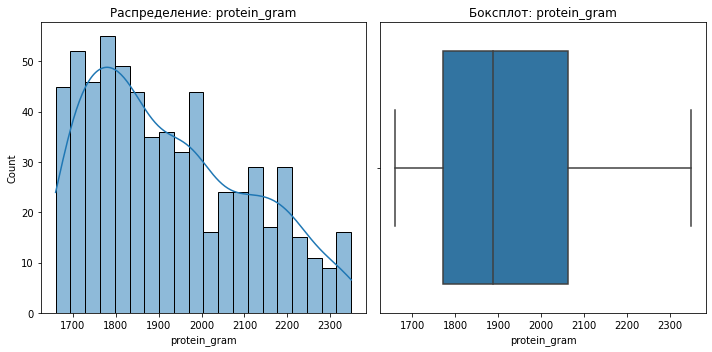

In [19]:
plot_column(ferma, 'protein_gram')

**Комментарий:** Среднее значение количества протеина в граммах в удое молока - 1923. Минимально - 1660 г, максимум - 2349 г. 

Описательная статистика для столбца: spo
count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spo, dtype: float64 



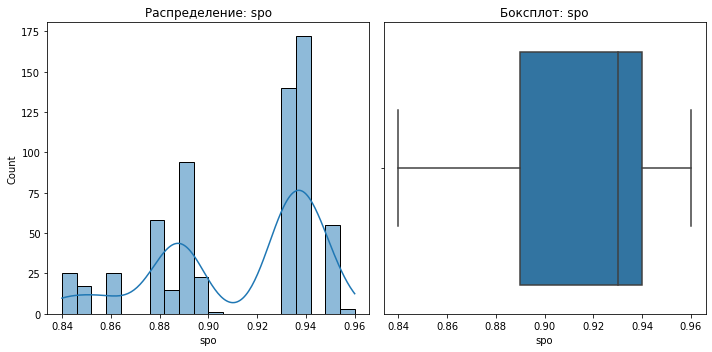

In [20]:
plot_column(ferma, 'spo')

**Комментарий:** Среднее значение сахаро-протеинового соотношения около 0,91. Минимальное значение - 0,84, максимальное - 0,96. 

Описательная статистика для столбца: fat_proc
count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_proc, dtype: float64 



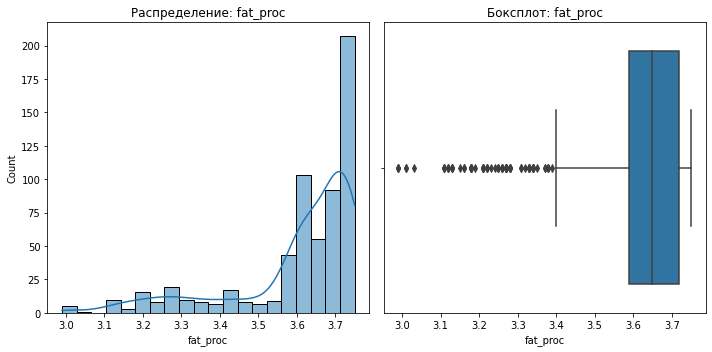

In [21]:
plot_column(ferma, 'fat_proc')

**Комментарий:** Среднее значение по жирности молока - 3,6%. Меньше 3% по сути не встречается, максимальная жирность - 3,75%. Значения ниже 3.1 явно являются редкими, но на статистику вряд ли сильно влияют, выбросными их считать сложно. 

Описательная статистика для столбца: protein_proc
count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_proc, dtype: float64 



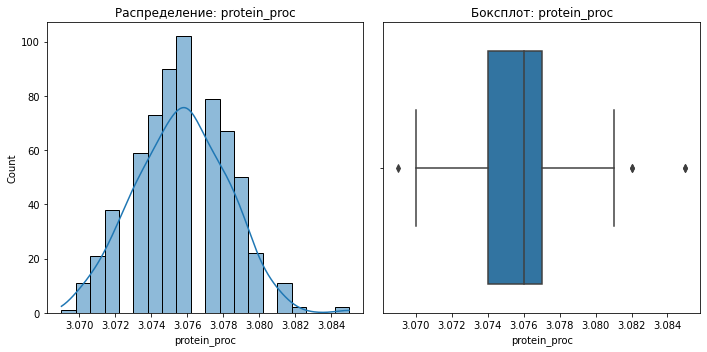

In [22]:
plot_column(ferma, 'protein_proc')

**Комментарий:** Среднее значение по процентному содержанию протеина в молоке - 3,07%.  "Разброс" в этом случае довольно маленький (~0,0025), минимум - 3,07%, максимум - 3,09%, то есть процент протеина практически всегда примерно один и тот же.

Описательная статистика для столбца: breed
count                628
unique                 2
top       Вис Бик Айдиал
freq                 372
Name: breed, dtype: object 



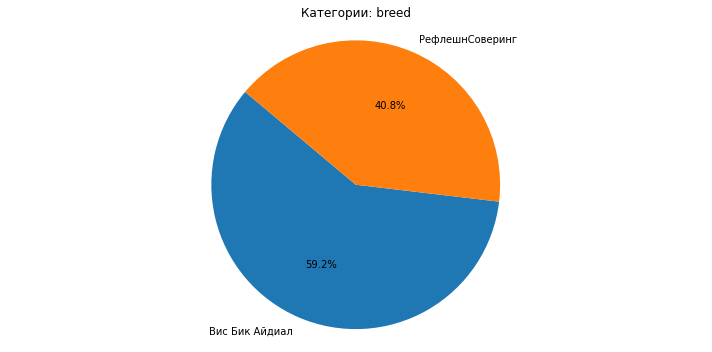

In [23]:
plot_column(ferma, 'breed')

**Комментарий:** В выборке представлены две породы, большинство коров породы Вис Бик Айдиал (373 голов), 59.2% от выборки.

Описательная статистика для столбца: type_of_pasture
count           628
unique            2
top       холмистое
freq            350
Name: type_of_pasture, dtype: object 



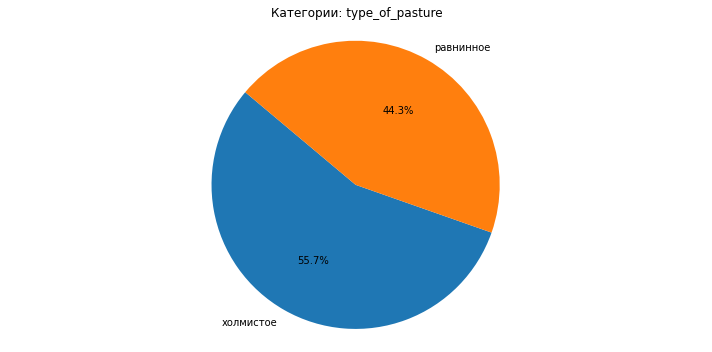

In [24]:
plot_column(ferma, 'type_of_pasture')

**Комментарий:** В выборке представлены два варианта пастбища: равнинное или холмистое. Относительно равноценно присутствуют оба варианта, но большинство коров (55,7%) паслось на холмистых пастбищах (350 голов)

Описательная статистика для столбца: breed_dad_bull
count        628
unique         2
top       Айдиал
freq         317
Name: breed_dad_bull, dtype: object 



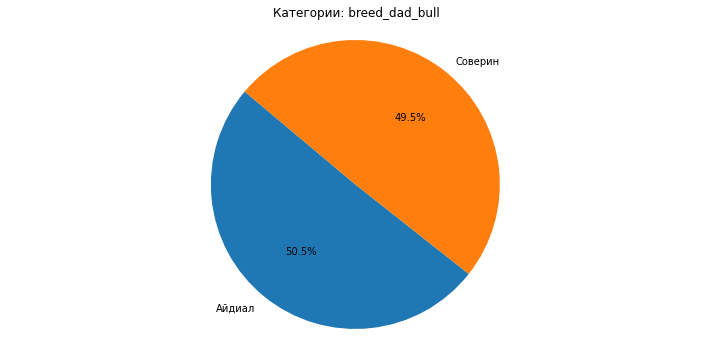

In [25]:
plot_column(ferma, 'breed_dad_bull')

**Комментарий:** В выборке представлены две "отцовских" породы: Айдиал и Соверин. Относительно равноценно присутствуют оба варианта: 50.5% Айдиал против 49.5% Соверина. 

Описательная статистика для столбца: taste
count        628
unique         2
top       вкусно
freq         370
Name: taste, dtype: object 



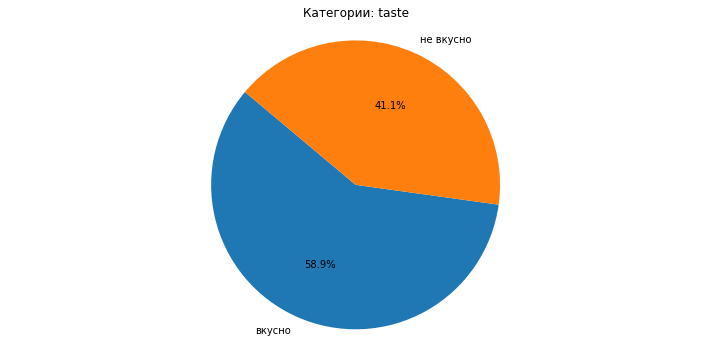

In [26]:
plot_column(ferma, 'taste')

**Комментарий:** Ура! Большая часть молока вкусная (58.9%), хотя показатель не велик.

Описательная статистика для столбца: age
count             628
unique              2
top       более_2_лет
freq              518
Name: age, dtype: object 



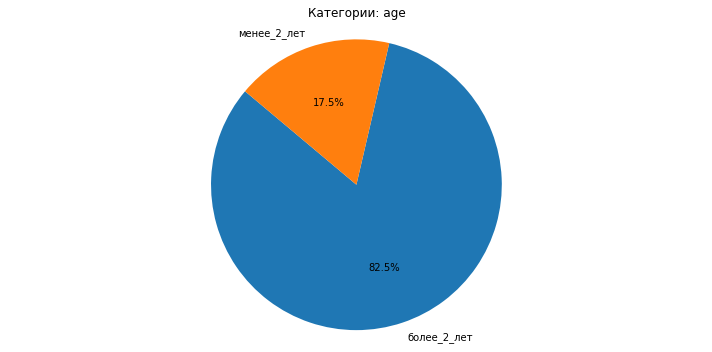

In [27]:
plot_column(ferma, 'age')

**Комментарий:** Большая часть поголовья фермы - уже более возрастные коровы, старше 2 лет (82.5%)

### Исследовательский анализ данных: датасет dad

Описательная статистика для столбца: dad_name
count       629
unique        4
top       Барин
freq        240
Name: dad_name, dtype: object 



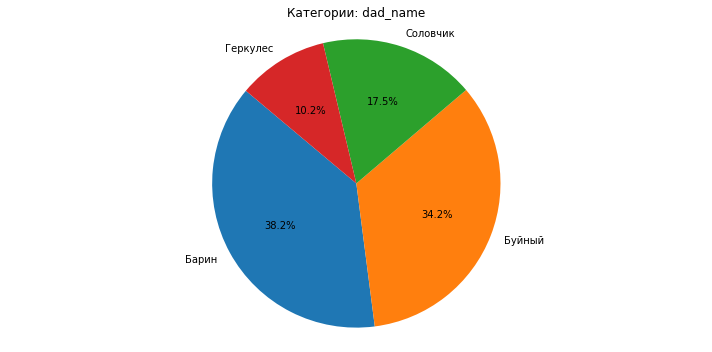

In [28]:
plot_column(dad, 'dad_name')

**Комментарий**: Больше всех генетически наследили в поголовье Барин (отец для 38.2% коров) и Буйный (34.2%). Сильно меньше Соловчик (17.5%) и Геркулес (10.2%).

### Исследовательский анализ данных: датасет cow_buy

Описательная статистика для столбца: fat_proc
count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: fat_proc, dtype: float64 



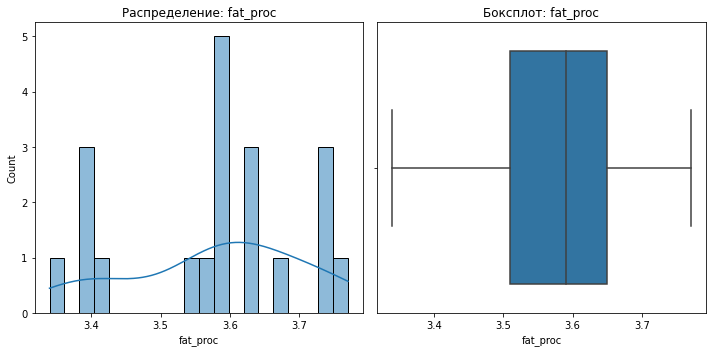

In [29]:
plot_column(cow_buy, 'fat_proc')

**Комментарий:** В среднем жирность молока у коров Экофермы 3.6%, минимум 3.34% и максимум 3.77%. Довольно схожие показатели с теми, что представлены у фермера "Вольный луг".

Описательная статистика для столбца: protein_proc
count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: protein_proc, dtype: float64 



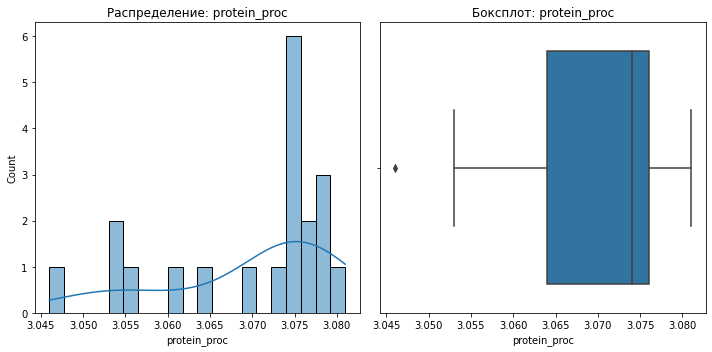

In [30]:
plot_column(cow_buy, 'protein_proc')

**Комментарий:** В среднем процентное содержание протеина у коров Экофермы 3.07%, минимум 3.05% и максимум 3.08%. Показатели практически идентичны тем, что предоставила ферма "Вольный луг".

Описательная статистика для столбца: breed
count                  20
unique                  2
top       РефлешнСоверинг
freq                   11
Name: breed, dtype: object 



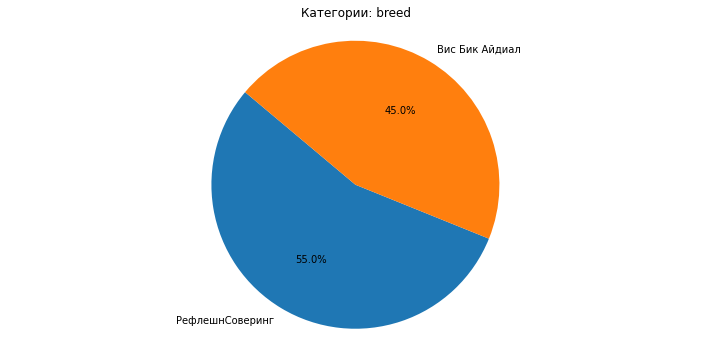

In [31]:
plot_column(cow_buy, 'breed')

**Комментарий:** среди коров «ЭкоФермы», которых фермер хочет изучить перед покупкой, равноценно представлены две породы: 11 РефлешнСоверинг и 9 Вис Бик Айдиал. 

Описательная статистика для столбца: type_of_pasture
count            20
unique            2
top       равнинное
freq             11
Name: type_of_pasture, dtype: object 



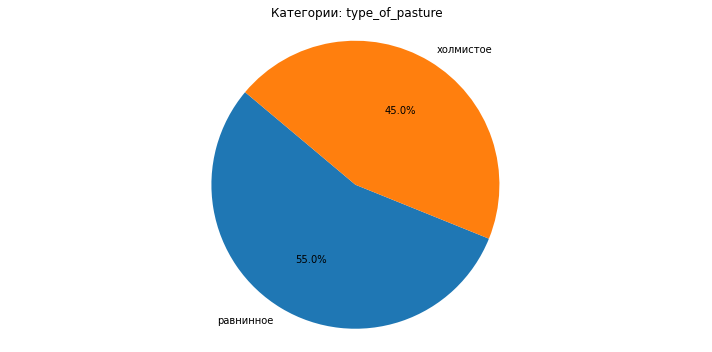

In [32]:
plot_column(cow_buy, 'type_of_pasture')

**Комментарий:** В выборке представлены два варианта пастбища: равнинное или холмистое. Относительно равноценно присутствуют оба варианта, но большинство коров (55%) паслось на холмистых пастбищах (11 голов).

Описательная статистика для столбца: dad_name
count         20
unique         4
top       Буйный
freq           8
Name: dad_name, dtype: object 



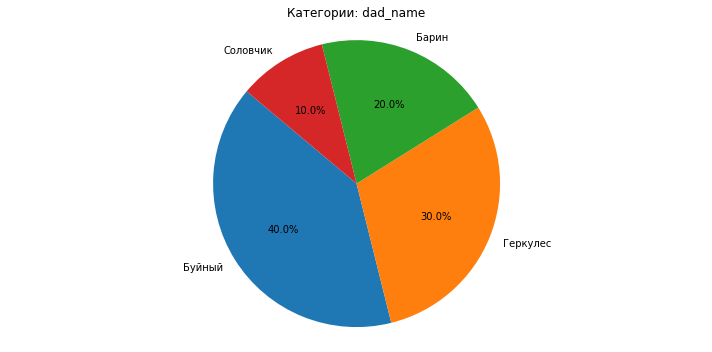

In [33]:
plot_column(cow_buy, 'dad_name')

**Комментарий:** Не совсем понятно, как так получилось, что имена отцовских коров совпадают у нашего фермера и у Экофермы, но выводы сделаем: больше всего коров с отцом Буйным (40%), 8 коров из 20, на втором месте Геркулес (30%), дальше Барин (20%) и Соловчик (10%). 

Описательная статистика для столбца: breed_dad_bull
count          20
unique          2
top       Соверин
freq           12
Name: breed_dad_bull, dtype: object 



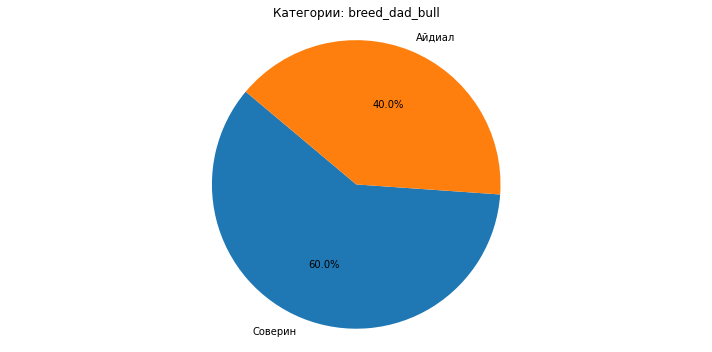

In [34]:
plot_column(cow_buy, 'breed_dad_bull')

**Комментарий:** Среди отцовских пород представлены 2: Соверин (60%) и Айдиал (40%). 

Описательная статистика для столбца: age
count              20
unique              2
top       более_2_лет
freq               15
Name: age, dtype: object 



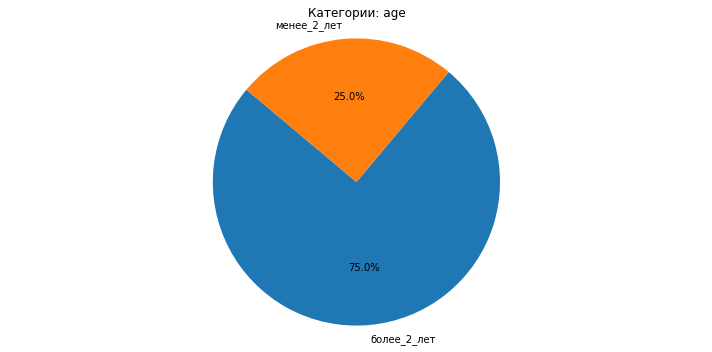

In [35]:
plot_column(cow_buy, 'age')

**Комментарий:** Большая часть представленных к покупке коров старше 2 лет (15 голов из 20). 

### Исследовательский анализ данных: выводы

Представленные данные достаточно полные, корректные, равнозначные с минимум выбросов. На данном этапе можно сделать следующие выводы:
1. **Показатели у коров фермы "Вольный луг" (датасет ferma и dad)**:
- В среднем удой молока у коровы фермы "Вольный луг" около 6,1 кг.
- Среднее значение количества протеина в граммах в удое молока - 1923.
- Среднее значение сахаро-протеинового соотношения около 0,91.
- Среднее значение по жирности молока - 3,6%. Меньше 3% по сути не встречается, максимальная жирность - 3,75%. 
- Среднее значение по процентному содержанию протеина в молоке - 3,07%. "Разброс" в этом случае довольно маленький (~0,0025), минимум - 3,07%, максимум - 3,09%, то есть процент протеина практически всегда примерно один и тот же.
- Представлены две породы (Вис Бик Айдиал и РефлешнСоверинг), большинство коров породы Вис Бик Айдиал (373 голов), 59.2% от выборки.
- Представлены два варианта пастбища: равнинное или холмистое. Относительно равноценно присутствуют оба варианта, но большинство коров (55,7%) паслось на холмистых пастбищах (350 голов).
- В выборке представлены две "отцовских" породы: Айдиал и Соверин. Относительно равноценно присутствуют оба варианта: 50.5% Айдиал против 49.5% Соверина. Больше всех генетически наследили в поголовье Барин (отец для 38.2% коров) и Буйный (34.2%). Сильно меньше Соловчик (17.5%) и Геркулес (10.2%).
- Большая часть молока вкусная (58.9%).
- Большая часть поголовья фермы - уже более возрастные коровы, старше 2 лет (82.5%).

2. **Показатели у коров Экофермы, рассматриваемых для продажи (датасет cow_buy)**:
- В среднем жирность молока у коров Экофермы 3.6%, минимум 3.34% и максимум 3.77%. Довольно схожие показатели с теми, что представлены у фермера "Вольный луг".
- В среднем процентное содержание протеина у коров Экофермы 3.07%, минимум 3.05% и максимум 3.08%. Показатели практически идентичны тем, что предоставила ферма "Вольный луг".
- Среди коров «ЭкоФермы» равноценно представлены две породы: 11 РефлешнСоверинг и 9 Вис Бик Айдиал.
- Коровы паслись и на холмистых (11 голов), и на равнинных пастбищах (9 голов).
- Больше всего коров с отцом Буйным (40%), 8 коров из 20, на втором месте Геркулес (30%), дальше Барин (20%) и Соловчик (10%). Среди отцовских пород представлены 2: Соверин (60%) и Айдиал (40%).
- Большая часть представленных к покупке коров старше 2 лет (15 голов из 20).

## Корреляционный анализ

На данном этапе работы мы проведем корреляционный анализ признаков, которые представлены в датасета ferma от фермы "Вольный луг", и сделаем выводы об их взаимосвязи.

### Матрица корреляции количественных признаков

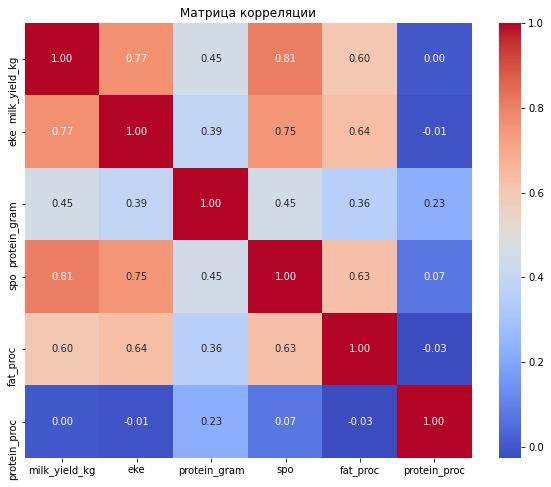

In [36]:
#исключаем столбец 'id' и выбираем только числовые столбцы
numeric_columns = ferma.drop(columns=['id']).select_dtypes(include=['float64', 'int64'])

#вычисляем матрицу корреляции
corr_matrix = numeric_columns.corr()

#строим тепловую карту корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Матрица корреляции')
plt.show()

**Комментарий:** Высокую прямую коррелляцию мы видим между удоем и:
- СПО (сахаро-протеиновым соотношением) - 0.81, то есть чем больше удой, тем выше соотношение сахар/протеин;
- ЭКЕ (энергетической кормовой единицей) - 0.77, то есть чем больше удой, тем питательнее молоко.

Прямая, пусть и невысокая, корреляция есть между удоем и:
- жирностью молока - 0.6, чем больше удой, чем выше жирность;
- количеством протеина в граммах - 0.45, чем больше удой, тем больше протеина.

Высокую корреляцию ещё также можем увидеть между питательностью молока и соотношением сахара/протеина, а также жирностью молока.

Для большей наглядности рассмотрим более подробно каждый признак в отдельности, построив диаграммы рассеяния.

### Диаграммы рассеяния: корреляция между удоем и количественными признаками

#### С учетом породы

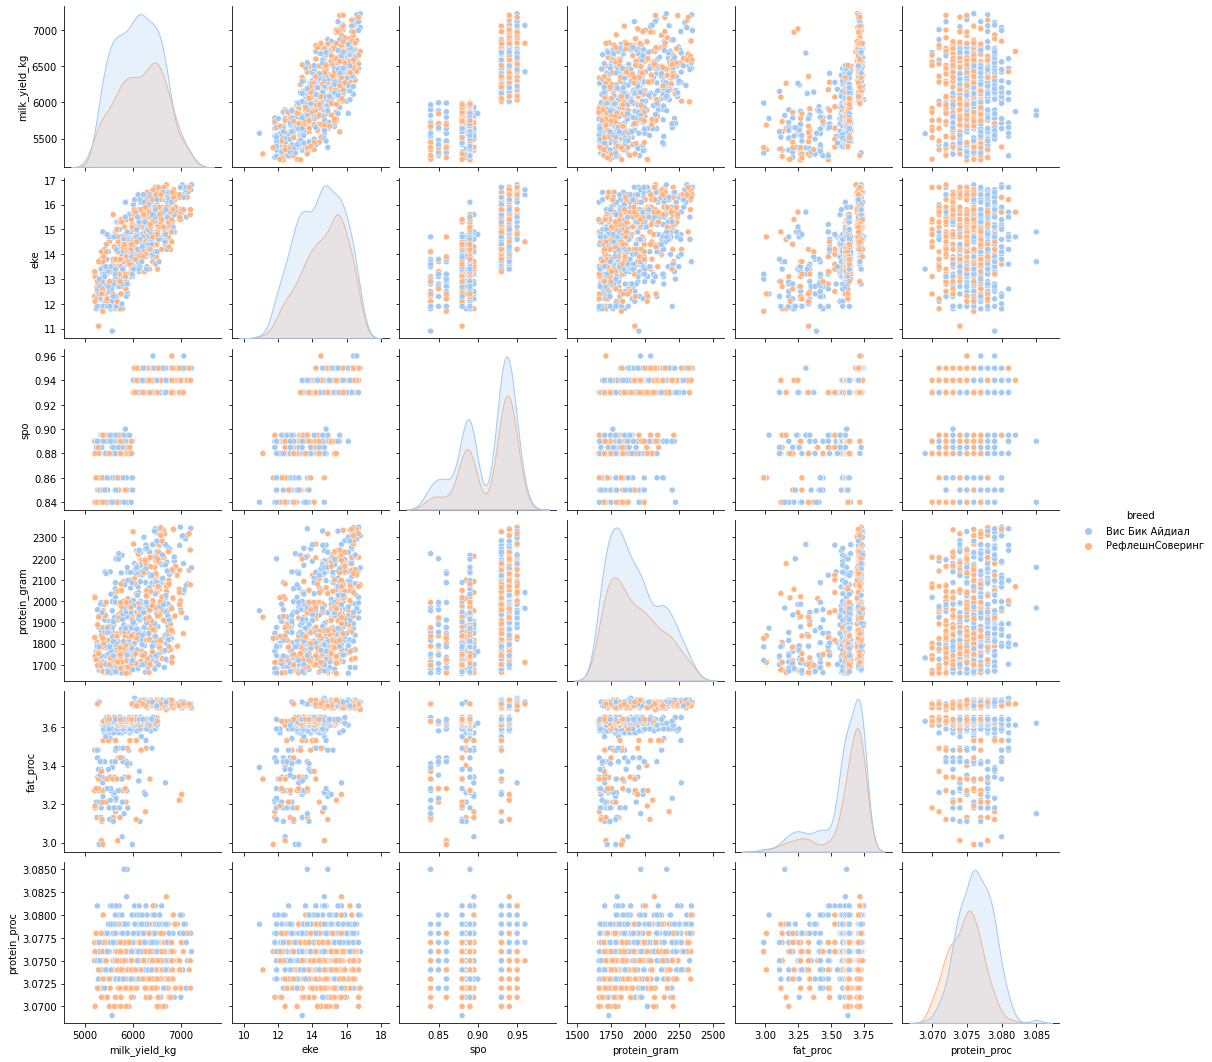

In [37]:
sns.pairplot(ferma, hue='breed', vars=['milk_yield_kg', 'eke', 'spo', 'protein_gram', 'fat_proc', 'protein_proc'], palette='pastel')
plt.show()

**Комментарий:** Из построенных диаграмм рассеяния можем сделать следующие выводы о взаимосвязи признака удой, кг и всех количественных признаков с учётом значения породы:
- высокая прямая корреляция между удоем и ЭКЕ действительно есть, зависимость породы от удоя или же ЭКЕ не обнаружена;
- невысокая прямая корреляция между удоем и количеством белка, зависимость количества белка от породы не обнаружена;
- невысокая прямая корреляция между удоем и соотношение сахара/протеина, зависимость СПО от породы не обнаружена;
- невысокая прямая корреляция между удоем и жирностью молока, зависимость жирности от породы не обнаружена;
- практически никакой корреляции между удоем и процентным содержанием белка в молоке, у породы Вис Бик Айдиалл, судя по диаграмме, вероятно, процентное содержание чаще всего чуть выше, чем у РефлешнСоверинг. 

#### С учетом типа пастбища

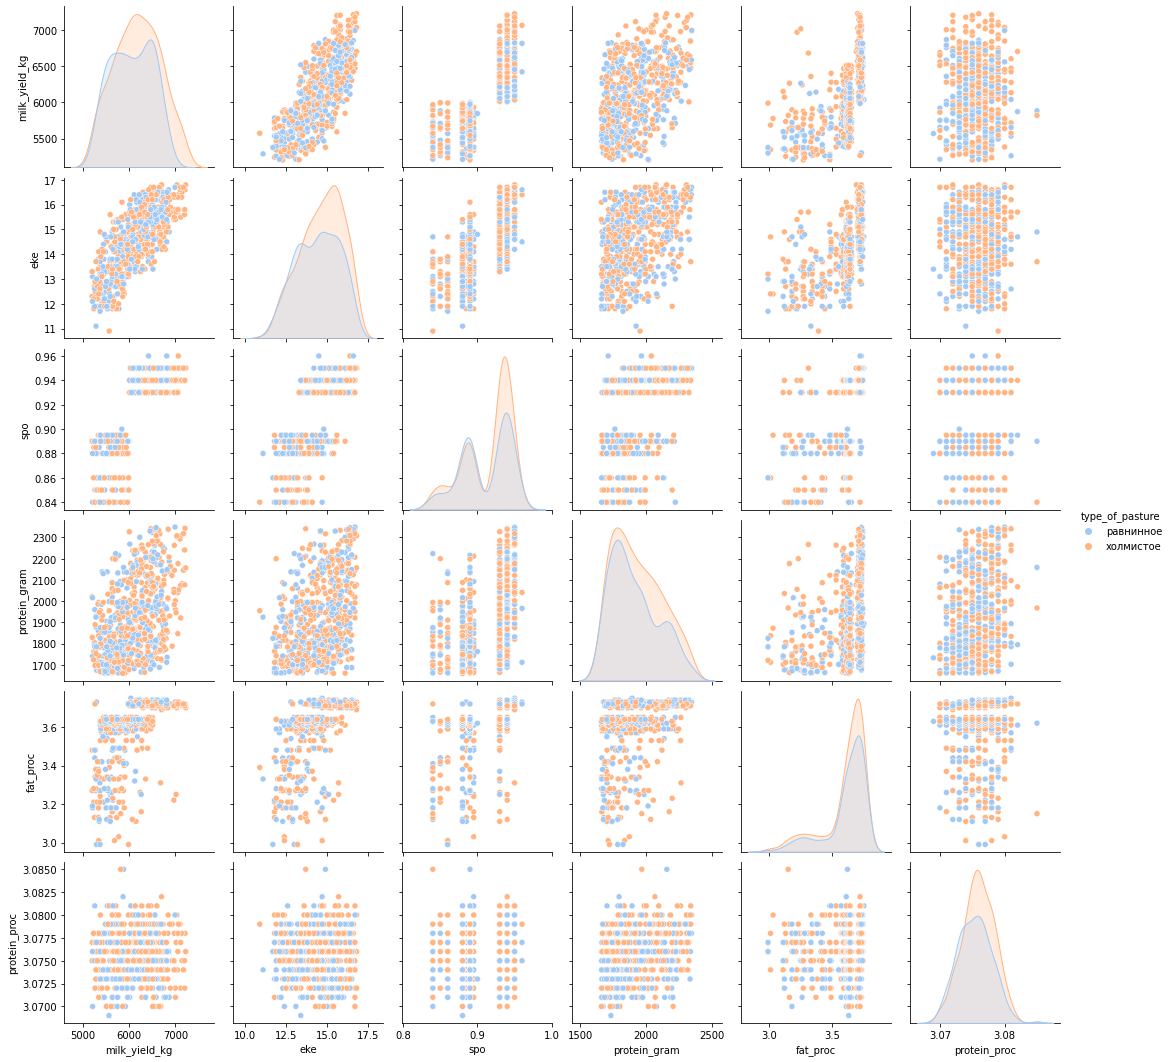

In [38]:
sns.pairplot(ferma, hue='type_of_pasture', vars=['milk_yield_kg', 'eke', 'spo', 'protein_gram', 'fat_proc', 'protein_proc'], palette='pastel')
plt.show()

**Комментарий:** Из данных диаграмм можем сделать вывод, что среди тех коров, что пасутся на холмистых пастбищах, чаще встречаются с близким к максимальному показателем удоя, но корреляция, опять же, не сильная. С другими количественными показателями у типа пастбища корреляции практически нет, минимальная с количеством / процентным содержанием белка. 

#### С учетом возраста

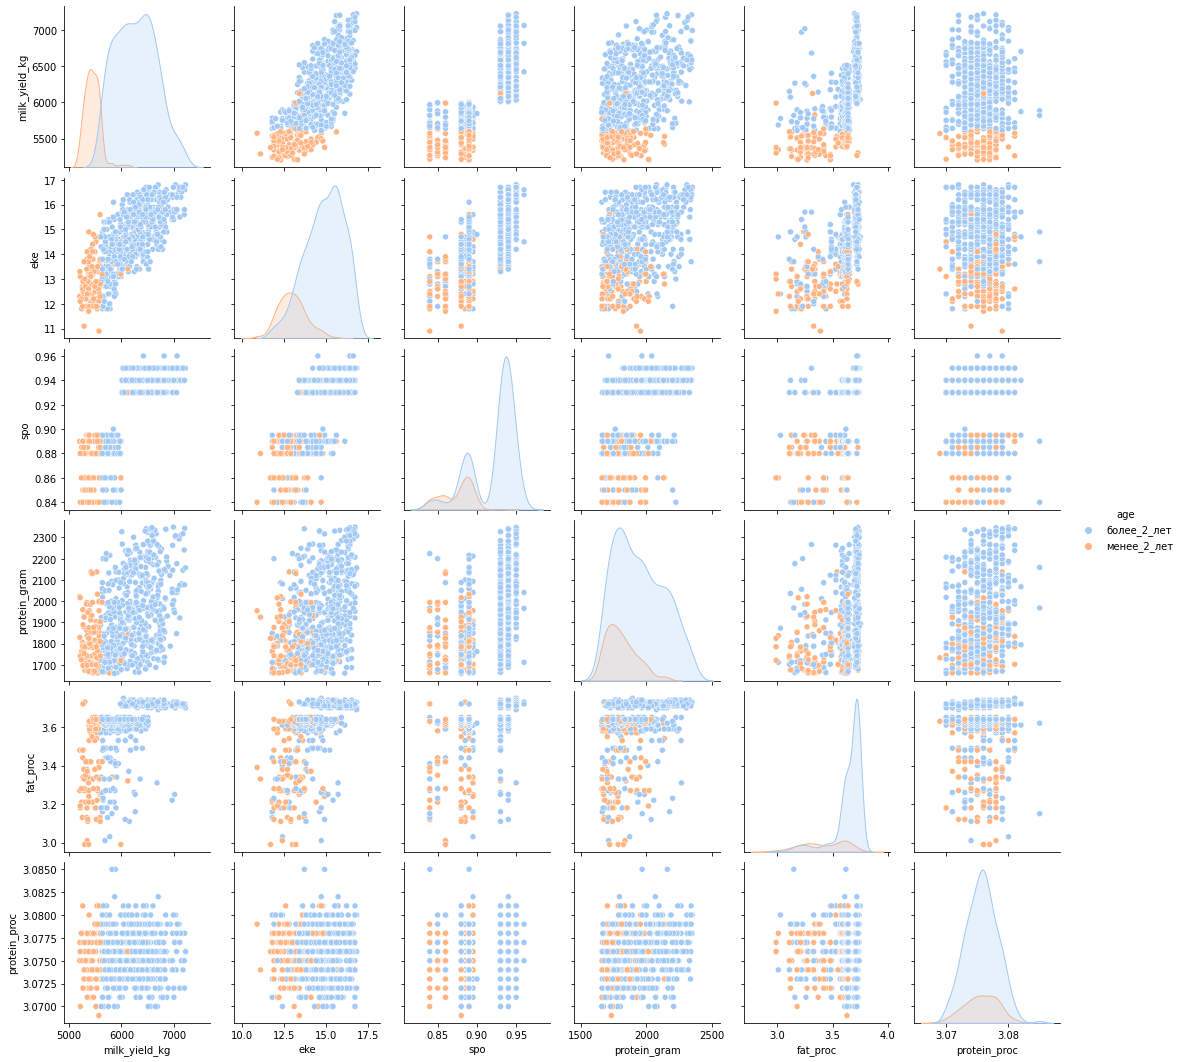

In [39]:
sns.pairplot(ferma, hue='age', vars=['milk_yield_kg', 'eke',  'spo', 'protein_gram', 'fat_proc', 'protein_proc'], palette='pastel')
plt.show()

**Комментарий:** Из данных диаграмм очевидно, что если корова старше 2 лет, она дает больше молока, чем молодая корова: удой выше. Также можем отметить, что более старший возраст коровы влияет на:
- жирность молока - зрелая корова чаще дает более жирное молоко;
- СПО - у зрелой коровы выше соотношение сахар/протеин;
- количество белка - очевидно из-за количества молока (выше удой - выше граммовка белка), дублирующие друг друга признаки;
- питательность молока - тоже из-за прямой корреляции (выше удой - больше молока - больше питательности), дублирующие друг друга признаки.

Процентное содержание белка корреляции с возрастом не имеет. 

### Диаграммы рассеяния: корреляция между вкусом и количественными признаками

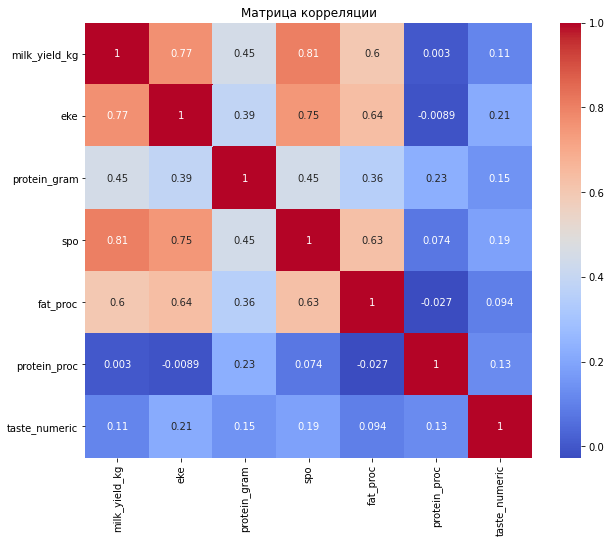

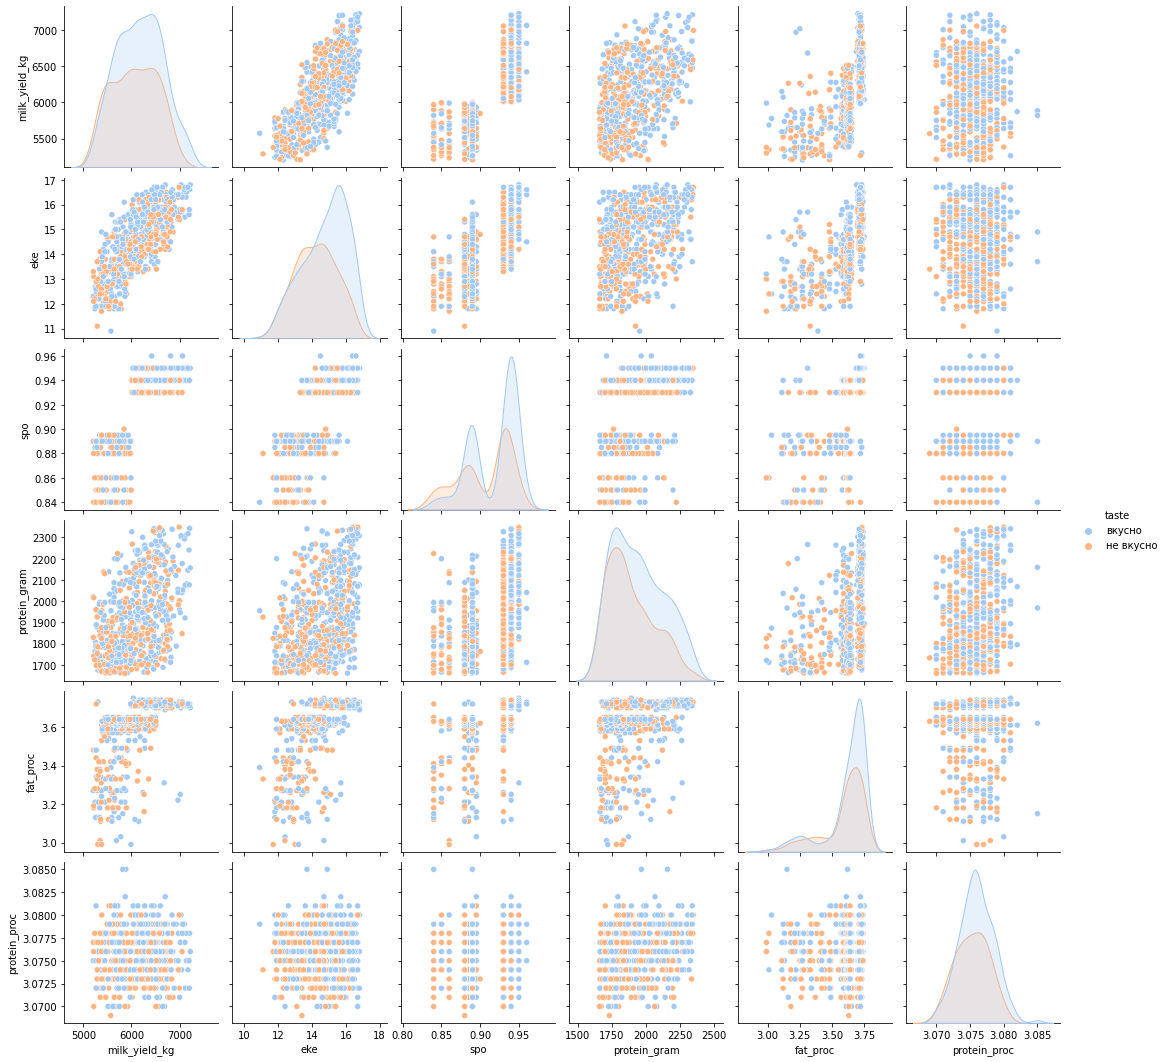

In [40]:
ferma_numeric = ferma.drop(columns=['id'])

ferma_numeric['taste_numeric'] = ferma['taste'].map({'вкусно': 1, 'не вкусно': 0}) 
#добавляем столбец с бинарными значениями вкуса, чтобы было проще строить матрицу корреляции

#матрица корреляции
correlation_matrix = ferma_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

#диаграмма рассеивания
sns.pairplot(ferma_numeric, hue='taste', vars=['milk_yield_kg', 'eke',  'spo', 'protein_gram', 'fat_proc', 'protein_proc'], palette='pastel')
plt.show()

**Комментарий**: Из матрицы и диаграмм мы видим, что прямого влияния на вкус какого-то отдельного количественного признака/параметра нет: слабая прямая корреляция наблюдается с питательностью молока, с количеством и процентным содержанием белка и с сооотношением сахара/протеина. С большой вероятностью, на вкус влияет комбинация параметров. 

#### С учетом породы

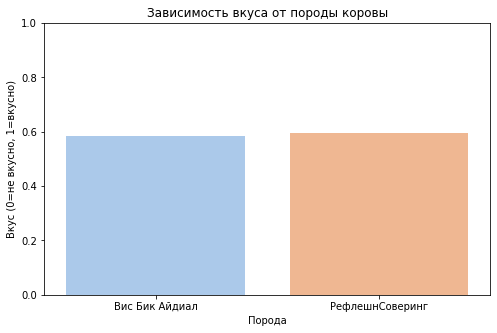

In [41]:
#построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x='breed', y='taste_numeric', data=ferma_numeric, ci=None, palette='pastel')
plt.title("Зависимость вкуса от породы коровы")
plt.xlabel("Порода")
plt.ylabel("Вкус (0=не вкусно, 1=вкусно)")
plt.ylim(0, 1)
plt.show()

**Комментарий:** Корреляция между вкусом и породой отсутствует. 

#### С учетом типа пастбища

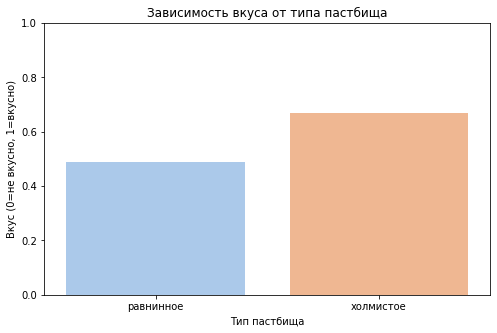

In [42]:
#построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x='type_of_pasture', y='taste_numeric', data=ferma_numeric, ci=None, palette='pastel')
plt.title("Зависимость вкуса от типа пастбища")
plt.xlabel("Тип пастбища")
plt.ylabel("Вкус (0=не вкусно, 1=вкусно)")
plt.ylim(0, 1)
plt.show()

**Комментарий**: Корреляция между вкусом и типом пастбища слабая, но с чуть большей вероятностью корова, которая паслась на холмистой местности, даст вкусное молоко. 

#### С учетом возраста 

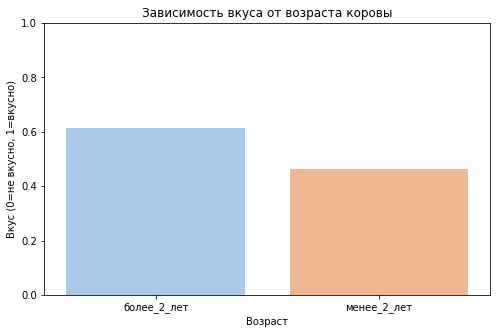

In [43]:
#построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x='age', y='taste_numeric', data=ferma_numeric, ci=None, palette='pastel')
plt.title("Зависимость вкуса от возраста коровы")
plt.xlabel("Возраст")
plt.ylabel("Вкус (0=не вкусно, 1=вкусно)")
plt.ylim(0, 1)
plt.show()

**Комментарий:** Есть слабая корреляция между возрастом и вкусом: с чуть большей вероятностью вкус молока будет лучше у более взрослой коровы. 

### Корреляционный анализ: выводы

На данном этапе можем сделать следующие выводы:
1. Есть корреляция между целевым признаком удой и такими входными признаками, как:
- ЭКЕ, СПО, возраст коровы - высокая прямая корреляция;
- жирность молока, количества белка - средняя прямая корреляция;
- тип пастбища (холмистость) - слабая прямая корелляция.
2. Нет очевидной прямой корреляции между целевым признаком вкус и отдельными входными признаками: вероятнее всего, на вкус влияет совокупность признаков (возраст коровы, тип пастбища, содержание сахара/белка и т.д.). Исправить это нелинейность можно, как раз, вероятно, созданием подходящих комбинаций.
3. Нелинейная зависимость есть между удоем и СПО (график делится на кластеры) и между удоем и ЭКЕ (график образует неявную параболу). Чтобы устранить нелинейность, СПО можно преобразовать в категориальный бинарный признак, использовав границу кластеров, а для решения проблемы с ЭКЕ можно ввести новый признак: ЭКЕ в квадрате.
4. Мультиколлинеарность между входными признаками не наблюдается: о ней стоит говорить при значении коэффициента корреляции от 0.9 до 0.95 по модулю. В такой ситуации лишние коррелирующие признаки можно было бы удалить из обучающей выборки, но в нашем случае максимальный показатель корреляции только 0.81, поэтому потребности в удалении "дублей" признаков нет необходимости.

## Обучение модели линейной регрессии

На данном шаге мы обучим три модели простой линейной регрессии.

### Модель №1

#### Подготовка данных

В качестве целевого признака при обучении модели мы будем использовать Удой (кг). Среди признаков, которые подходят для модели линейной регрессии, можем взять следующие: 
- возраст коровы;
- жирность молока;
- количества белка;
- ЭКЕ;
- СПО;
- порода;
- тип пастбища.

Все 4 признака имеют отношения к четырем разным группам: характеристики коровы, характеристики корма, характеристика пастбища и характеристики молока. Параметры корма ЭКЕ и СПО имеют нелинейную зависимость с Удоем, а также отсуствуют в качестве данных в датасете от Экофермы.

In [44]:
#сохраняем датасет для первой модели
ferma_1 = ferma[['milk_yield_kg', 'eke', 'protein_gram', 'spo', 'breed', 'type_of_pasture', 'fat_proc', 'age']] 

#разбиваем данные на тренировочную и тестовые выборки
RANDOM_STATE = 42

X = ferma_1.drop('milk_yield_kg', axis=1)
y = ferma_1['milk_yield_kg']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [45]:
#кодируем категориальные признаки 
ferma_1_cat_col = ['breed', 'type_of_pasture', 'age']
encoder_1 = OneHotEncoder(drop='first', sparse=False)
encoder_1.fit(X_train_1[ferma_1_cat_col])

X_train_ohe_1 = encoder_1.transform(X_train_1[ferma_1_cat_col])
X_test_ohe_1 = encoder_1.transform(X_test_1[ferma_1_cat_col])

In [46]:
#масштабируем количественные признаки
ferma_1_num_col = ['eke', 'protein_gram', 'fat_proc', 'spo']
scaler_1 = StandardScaler()
scaler_1.fit(X_train_1[ferma_1_num_col])

X_train_scaled_1 = scaler_1.transform(X_train_1[ferma_1_num_col])
X_test_scaled_1 = scaler_1.transform(X_test_1[ferma_1_num_col])

#### Обучение модели

Обучаем модель линейной регрессии на подготовленных данных.

In [47]:
#объединяем приведенные в порядок выборки с количественными и категориальными признаками в одну
X_train_1_fin = np.concatenate([X_train_scaled_1, X_train_ohe_1], axis=1)
X_test_1_fin = np.concatenate([X_test_scaled_1, X_test_ohe_1], axis=1)

#обучение модели на тренировочных данных
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train_1_fin, y_train_1)

LinearRegression()

#### Оценка качества модели

Здесь мы оценим качество модели на тестовой выборке: рассчитаем R² и проанализируем остатки с помощью графиков.

R²: 0.7468049725895709


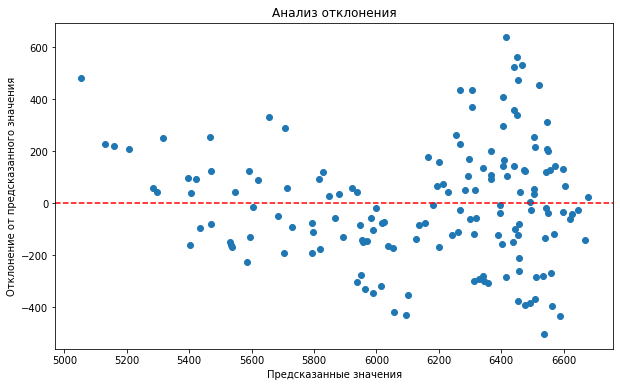

In [48]:
predictions_1 = model_lr_1.predict(X_test_1_fin)
r2_1 = r2_score(y_test_1, predictions_1)
print(f'R²: {r2_1}') 
residuals_1 = y_test_1 - predictions_1

plt.figure(figsize=(10, 6))
plt.scatter(predictions_1, residuals_1)
plt.axhline(0, color='red', linestyle='--')
plt.title('Анализ отклонения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Отклонение от предсказанного значения')
plt.show()

**Вывод**: По коэффициенту детерминации мы видим, что модель ещё далека от хорошего показателя: предсказывает корректно она почти в 75% случаев. Анализ остатков показывает, что их распределение неслучайно, мы видим чередование низкой и высокой дисперсии остатков, что тоже говорит о том, что использовать такую модель мы не можем. Исправить это можно добавлением в модель дополнительных признаков либо трансформацией данных. Это мы учтем при создании других моделей.

### Модель №2

#### Обновление параметров: СПО и ЭКЕ

Чтобы сделать модель точнее, мы скорректируем параметры СПО и ЭКЕ, так как они сильно кореллируют с параметром Удоя. Для того, чтобы для линейной регрессии они были более информативны, нужно устранить нелинейность в их связи. Чтобы устранить нелинейность в связи СПО и Удой мы преобразуем СПО в категориальный бинарный признак. На диаграмме рассеяния с СПО и Удоем наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами, эту границу мы и будем использовать. 

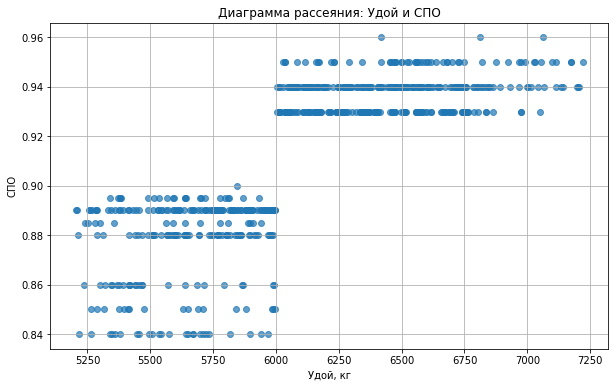

In [49]:
#строим диаграмму рассеяния Удоя и СПО, чтобы увидеть точнее границу кластеров
plt.figure(figsize=(10, 6))
plt.scatter(ferma['milk_yield_kg'], ferma['spo'], alpha=0.7)
plt.title('Диаграмма рассеяния: Удой и СПО')
plt.xlabel('Удой, кг')
plt.ylabel('СПО')
plt.grid(True)
plt.show()

     spo  spo_2
0  0.890      0
1  0.890      0
2  0.885      0
3  0.885      0
4  0.885      0


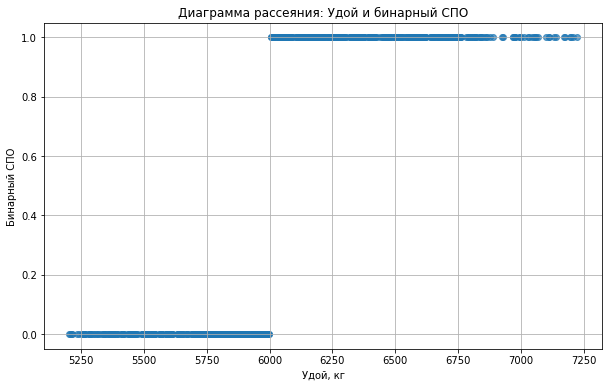

In [50]:
threshold_spo = 0.9

#создаем новый бинарный столбец
ferma['spo_2'] = (ferma['spo'] > threshold_spo).astype(int)

#проверяем результат
print(ferma[['spo', 'spo_2']].head())

#строим скорректированную диаграмму рассеяния для проверки
plt.figure(figsize=(10, 6))
plt.scatter(ferma['milk_yield_kg'], ferma['spo_2'], alpha=0.7)
plt.title('Диаграмма рассеяния: Удой и бинарный СПО')
plt.xlabel('Удой, кг')
plt.ylabel('Бинарный СПО')
plt.grid(True)
plt.show()

Нелинейность между ЭКЕ и Удоем можно исключить, если ввести новый признак ЭКЕ в квадрате.

    eke   eke_2
0  14.2  201.64
1  12.8  163.84
2  14.0  196.00
3  12.4  153.76
4  12.8  163.84


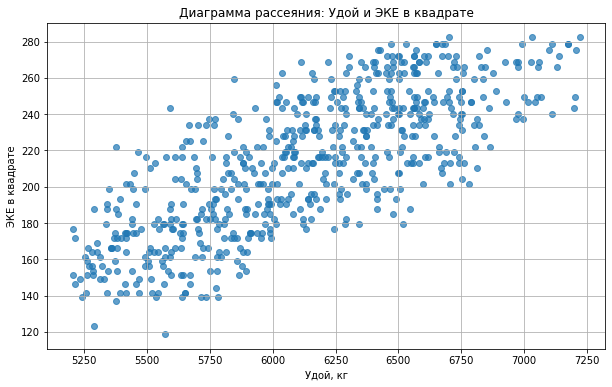

In [51]:
#добавляем столбец с ЭКЕ в квадрате
ferma['eke_2'] = ferma['eke'] ** 2

#проверяем результат
print(ferma[['eke', 'eke_2']].head())

#строим новую диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(ferma['milk_yield_kg'], ferma['eke_2'], alpha=0.7)
plt.title('Диаграмма рассеяния: Удой и ЭКЕ в квадрате')
plt.xlabel('Удой, кг')
plt.ylabel('ЭКЕ в квадрате')
plt.grid(True)
plt.show()

In [52]:
ferma.head()

,id,milk_yield_kg,eke,protein_gram,spo,breed,type_of_pasture,breed_dad_bull,fat_proc,protein_proc,taste,age,spo_2,eke_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [53]:
#создаем новую таблицу ferma_2 с обновленными параметрами

ferma_2 = ferma[['milk_yield_kg', 'protein_gram', 'breed', 'type_of_pasture', 'fat_proc', 'age', 'spo_2', 'eke_2']] 

#### Подготовка данных

In [54]:
#разбиваем данные на тренировочную и тестовые выборки
RANDOM_STATE = 42

X = ferma_2.drop('milk_yield_kg', axis=1)
y = ferma_2['milk_yield_kg']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [55]:
#кодируем категориальные признаки 
ferma_2_cat_col = ['breed', 'type_of_pasture', 'age', 'spo_2']
encoder_2 = OneHotEncoder(drop='first', sparse=False)
encoder_2.fit(X_train_2[ferma_2_cat_col])

X_train_ohe_2 = encoder_2.transform(X_train_2[ferma_2_cat_col])
X_test_ohe_2 = encoder_2.transform(X_test_2[ferma_2_cat_col])

In [56]:
#масштабируем количественные признаки
ferma_2_num_col = ['protein_gram', 'fat_proc', 'eke_2']
scaler_2 = StandardScaler()
scaler_2.fit(X_train_2[ferma_2_num_col])

X_train_scaled_2 = scaler_2.transform(X_train_2[ferma_2_num_col])
X_test_scaled_2 = scaler_2.transform(X_test_2[ferma_2_num_col])

#### Обучение модели

In [57]:
#объединяем приведенные в порядок выборки с количественными и категориальными признаками в одну
X_train_2_fin = np.concatenate([X_train_scaled_2, X_train_ohe_2], axis=1)
X_test_2_fin = np.concatenate([X_test_scaled_2, X_test_ohe_2], axis=1)

#обучение модели на тренировочных данных
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2_fin, y_train_2)

LinearRegression()

#### Оценка качества модели

R²: 0.7917806303972807


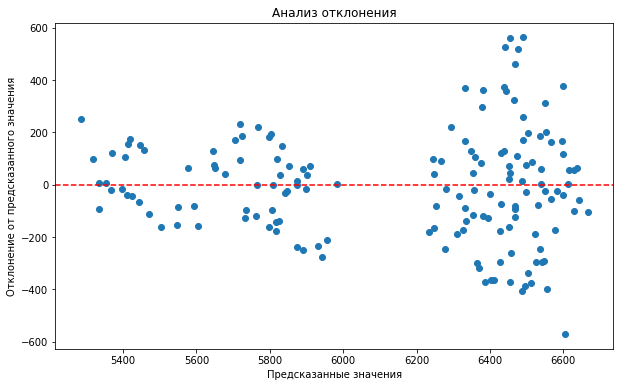

In [58]:
predictions_2 = model_lr_2.predict(X_test_2_fin)
r2_2 = r2_score(y_test_2, predictions_2)
print(f'R²: {r2_2}') 
residuals_2 = y_test_2 - predictions_2

plt.figure(figsize=(10, 6))
plt.scatter(predictions_2, residuals_2)
plt.axhline(0, color='red', linestyle='--')
plt.title('Анализ отклонения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Отклонение от предсказанного значения')
plt.show()

**Вывод**: По коэффициенту детерминации мы видим, что модель №2 ближе к хорошему показателю: предсказывает корректно она почти в 80% случаев! Но анализ остатков показывает, что их распределение неслучайно, мы видим чередование низкой и высокой дисперсии остатков, что говорит о том, что использовать такую модель мы, к сожалению, не можем. Исправить это можно добавлением в модель дополнительных признаков либо трансформацией данных. 

### Модель №3

#### Добавление нового параметра: Имя Папы

Новый признак мы добавим из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу. Перед этим необходимо проверить таблицы на масштаб. 

In [59]:
print(dad.info())
print("Размер dad:", dad.shape)
print(ferma.info())
print("Размер ferma:", ferma.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
Размер dad: (629, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               628 non-null    int64  
 1   milk_yield_kg    628 non-null    int64  
 2   eke              628 non-null    float64
 3   protein_gram     628 non-null    int64  
 4   spo              628 non-null    float64
 5   breed            628 non-null    object 
 6   type_of_pasture  628 non-null    object 
 7   breed_dad_bull   628 non-null    object 
 8   fat_proc         628 non-null    float64
 9   protein_proc     628 non-null    float64
 10  taste

**Комментарий**: В датасете ferma была удалена лишняя строка с выбросом показателя Удоя, из-за этого не совпадают размеры таблиц. При объединении данных на результатах исследования это не должно сказаться, поэтому всё же объединим датасеты.

In [60]:
merged_data = pd.merge(ferma, dad[['id', 'dad_name']], on='id', how='left')

#смотрим первые несколько строк объединённого датафрейма
print(merged_data.head())

   id  milk_yield_kg   eke  protein_gram    spo            breed  \
0   1           5863  14.2          1743  0.890   Вис Бик Айдиал   
1   2           5529  12.8          2138  0.890   Вис Бик Айдиал   
2   3           5810  14.0          1854  0.885  РефлешнСоверинг   
3   4           5895  12.4          2012  0.885  РефлешнСоверинг   
4   5           5302  12.8          1675  0.885   Вис Бик Айдиал   

  type_of_pasture breed_dad_bull  fat_proc  protein_proc      taste  \
0       равнинное         Айдиал      3.58         3.076     вкусно   
1       равнинное        Соверин      3.54         3.079     вкусно   
2       холмистое        Соверин      3.59         3.074  не вкусно   
3       холмистое         Айдиал      3.40         3.075  не вкусно   
4       равнинное        Соверин      3.73         3.073     вкусно   

           age  spo_2   eke_2  dad_name  
0  более_2_лет      0  201.64    Буйный  
1  менее_2_лет      0  163.84  Соловчик  
2  более_2_лет      0  196.00     Бари

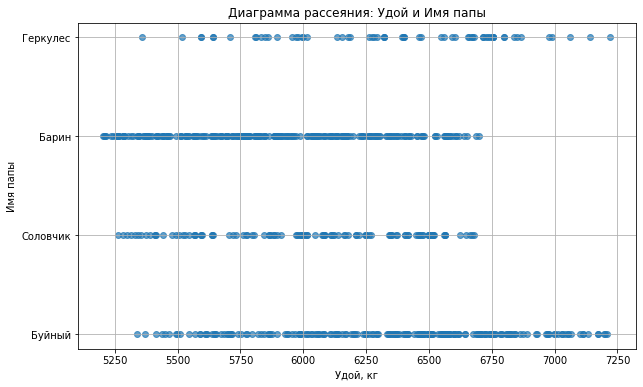

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['milk_yield_kg'], merged_data['dad_name'], alpha=0.7)
plt.title('Диаграмма рассеяния: Удой и Имя папы')
plt.xlabel('Удой, кг')
plt.ylabel('Имя папы')
plt.grid(True)
plt.show()

Нелинейность связи между Удоем и Именем папы можно устранить кодированием имен. 

#### Подготовка данных

In [62]:
#сохраняем датасет для третьей модели
ferma_3 = merged_data[[
    'milk_yield_kg', 
    'breed',
    'protein_gram', 
    'type_of_pasture', 
    'fat_proc', 
    'age', 
    'spo_2', 
    'eke_2', 
    'dad_name'
]] 

#разбиваем данные на тренировочную и тестовые выборки
RANDOM_STATE = 42

X = ferma_3.drop('milk_yield_kg', axis=1)
y = ferma_3['milk_yield_kg']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [63]:
#кодируем категориальные признаки 
ferma_3_cat_col = ['breed', 'type_of_pasture', 'age', 'dad_name', 'spo_2']
encoder_3 = OneHotEncoder(drop='first', sparse=False)
encoder_3.fit(X_train_3[ferma_3_cat_col])

X_train_ohe_3 = encoder_3.transform(X_train_3[ferma_3_cat_col])
X_test_ohe_3 = encoder_3.transform(X_test_3[ferma_3_cat_col])

In [64]:
#масштабируем количественные признаки
ferma_3_num_col = ['protein_gram', 'fat_proc', 'eke_2']
scaler_3 = StandardScaler()
scaler_3.fit(X_train_3[ferma_3_num_col])

X_train_scaled_3 = scaler_3.transform(X_train_3[ferma_3_num_col])
X_test_scaled_3 = scaler_3.transform(X_test_3[ferma_3_num_col])

#### Обучение модели

In [65]:
#объединяем приведенные в порядок выборки с количественными и категориальными признаками в одну
X_train_3_fin = np.concatenate([X_train_scaled_3, X_train_ohe_3], axis=1)
X_test_3_fin = np.concatenate([X_test_scaled_3, X_test_ohe_3], axis=1)

#обучение модели на тренировочных данных
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3_fin, y_train_3)

LinearRegression()

#### Оценка качества модели

R²: 0.8249557507592911


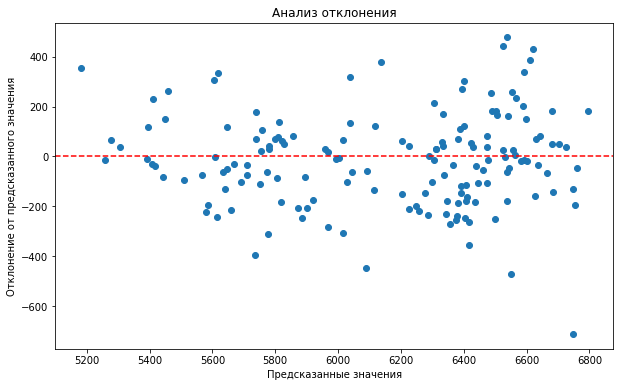

In [66]:
predictions_3 = model_lr_3.predict(X_test_3_fin)
r2_3 = r2_score(y_test_3, predictions_3)
print(f'R²: {r2_3}') 
residuals_3 = y_test_3 - predictions_3

plt.figure(figsize=(10, 6))
plt.scatter(predictions_3, residuals_3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Анализ отклонения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Отклонение от предсказанного значения')
plt.show()

**Вывод**: По коэффициенту детерминации мы видим, что модель №3 имеет хороший показатель: предсказывает корректно она более чем в 80% случаев! Анализ остатков показывает, что их распределение наиболее случайно, а значит, наиболее близко к нормальному, как минимум, по сравнению с другими моделями.

### Сравнение и оценка качества трех моделей: выбор лучшей

#### Сравнение качества моделей по R² и остаткам

- Модель №1: R² = 0.75, распределение остатков неслучайно, видим чередование низкой и высокой дисперсии остатков
- Модель №2: R² = 0.79, распределение остатков неслучайно, видим чередование низкой и высокой дисперсии остатков
- Модель №3: R² = 0.82, остатки распределены случайно

По данным показателям очевидно, что модель №3 наиболее корректна в работе.

#### Оценка качества моделей по трём метрикам: MSE, MAE, RMSE

Для расчёта метрик мы используем функцию.

In [67]:
#функции мы даем саму модель, тестовую выборку и истинные значения целевых признаков
def evaluate_model(model, X, y_true):
    #получаем предсказания модели
    y_pred = model.predict(X)
    
    #вычисляем метрики
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    #возвращаем результаты в виде словаря
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

#оценка каждой модели
results_model_1 = evaluate_model(model_lr_1, X_test_1_fin, y_test_1)
results_model_2 = evaluate_model(model_lr_2, X_test_2_fin, y_test_2)
results_model_3 = evaluate_model(model_lr_3, X_test_3_fin, y_test_3)

print("model_lr_1:", results_model_1)
print("model_lr_2:", results_model_2)
print("model_lr_3:", results_model_3)

model_lr_1: {'MSE': 51541.63676678629, 'MAE': 181.09558041679443, 'RMSE': 227.02783258179224}
model_lr_2: {'MSE': 42386.168581723585, 'MAE': 159.97971699400327, 'RMSE': 205.879014427706}
model_lr_3: {'MSE': 35632.87638289458, 'MAE': 145.52797487654763, 'RMSE': 188.7667247766263}


И снова видим, что по показателям MSE, MAE, RMSE  модель №3 показывает себя лучше всех.

#### Выбор лучшей модели и доверительный интервал

Очевидный фаворит среди трех моделей модель №3. Высчитаем доверительный интервал прогноза данной модели: так можно оценить неопределенность в предсказаниях модели. Для этого рассчитаем квантили ошибки модели на тренировочных данных.

In [68]:
y_train_pred_3 = model_lr_3.predict(X_train_3_fin)
errors = y_train_3 - y_train_pred_3

lower_quantile = np.percentile(errors, 2.5)  # 2.5%-квантиль
upper_quantile = np.percentile(errors, 97.5)  # 97.5%-квантиль

print(f"Доверительный интервал модели №3 - [{lower_quantile} - {upper_quantile}]")

Доверительный интервал модели №3 - [-341.59818492232466 - 372.8279874583659]


### Прогнозирование удоя коров ЭкоФермы

#### Добавление новых признаков в cow_buy

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить, данные о которых хранятся в датасете cow_buy. Для этого в первую очередь мы добавим недостающие признаки ЭКЕ, Сырой протеин (г) и СПО. Для этого мы используем средние значения каждого из признаков из датасета ferma и увеличим их на 5%, так как технологи Экофермы пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [69]:
cow_buy['eke'] = (ferma['eke'] * 1.05).mean()
cow_buy['eke_2'] = cow_buy['eke']**2
cow_buy['spo'] = (ferma['spo'] * 1.05).mean()
cow_buy['spo_2'] = True
cow_buy['protein_gram'] = (ferma['protein_gram'] * 1.05).mean()
cow_buy.head()

,breed,type_of_pasture,breed_dad_bull,dad_name,fat_proc,protein_proc,age,eke,eke_2,spo,spo_2,protein_gram
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,0.958744,True,2019.947532
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532


#### Подготовка данных

In [70]:
#кодируем категориальные признаки 
cow_buy_cat_col = ['breed', 'type_of_pasture', 'age', 'dad_name', 'spo_2']
ohe_yield = encoder_3.transform(cow_buy[cow_buy_cat_col])

#масштабируем количественные признаки
cow_buy_num_col = ['protein_gram', 'fat_proc', 'eke_2']
scl_yield = scaler_3.transform(cow_buy[cow_buy_num_col])

cow_buy_fin = np.concatenate([ohe_yield, scl_yield], axis=1)

In [71]:
#создание прогнозов по удою 
predictions_yield = model_lr_3.predict(cow_buy_fin)

    cow_ID  yield_prediction            breed type_of_pasture          age  \
0        1       6492.076132   Вис Бик Айдиал       холмистое  более_2_лет   
1        2       6560.022916   Вис Бик Айдиал       равнинное  менее_2_лет   
2        3       6453.163879  РефлешнСоверинг       равнинное  более_2_лет   
3        4       6476.892874  РефлешнСоверинг       холмистое  более_2_лет   
4        5       6473.495361  РефлешнСоверинг       равнинное  более_2_лет   
5        6       6664.000089  РефлешнСоверинг       равнинное  менее_2_лет   
6        7       6492.076132   Вис Бик Айдиал       холмистое  более_2_лет   
7        8       6413.961007   Вис Бик Айдиал       равнинное  более_2_лет   
8        9       6453.163879  РефлешнСоверинг       равнинное  более_2_лет   
9       10       6626.903669  РефлешнСоверинг       холмистое  менее_2_лет   
10      11       6278.363170   Вис Бик Айдиал       холмистое  более_2_лет   
11      12       6527.152247  РефлешнСоверинг       равнинное  б

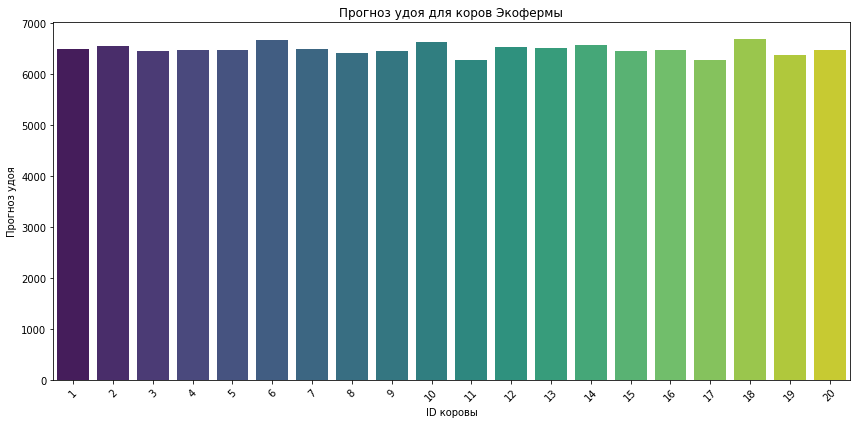

In [72]:
#подготовка датафрейма для наглядной визуализации
descriptions = cow_buy[['breed', 'type_of_pasture', 'age', 'dad_name', 'fat_proc', 'protein_proc']]

#создание датафрейма с прогнозами и описаниями
predictions_yield_df = pd.DataFrame({
    'cow_ID': list(range(1, len(predictions_yield) + 1)),
    'yield_prediction': predictions_yield
})

predictions_yield_df = pd.concat([predictions_yield_df, descriptions.reset_index(drop=True)], axis=1)

#выводим датафрейм
print(predictions_yield_df)

#визуализация предсказаний
plt.figure(figsize=(12, 6))
sns.barplot(x='cow_ID', y='yield_prediction', data=predictions_yield_df, palette='viridis')
plt.title('Прогноз удоя для коров Экофермы')
plt.xlabel('ID коровы')
plt.ylabel('Прогноз удоя')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод**: По запросу фермера по показателю удоя подходят все коровы (с большой вероятностью).

## Обучение модели логистической регрессии

### Подготовка данных

В качестве подходящих данных можем использовать данные датасета merged_data, так как в нем уже есть все необходимые для обучения параметры. В качестве целевого признака используем Вкус молока (taste_numeric). 

In [78]:
merged_data['taste_numeric'] = merged_data['taste'].map({'вкусно': 1, 'не вкусно': 0}) 
display(merged_data.head(5))

,id,milk_yield_kg,eke,protein_gram,spo,breed,type_of_pasture,breed_dad_bull,fat_proc,protein_proc,taste,age,spo_2,eke_2,dad_name,taste_numeric
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин,1


In [79]:
#готовим датасет для обучения
ferma_4 = merged_data[[ 
    'breed',
    'breed_dad_bull',
    'protein_gram', 
    'type_of_pasture', 
    'fat_proc', 
    'protein_proc',
    'age', 
    'taste_numeric', 
    'spo_2', 
    'eke_2', 
    'dad_name'
]] 

In [80]:
#разбиваем данные на тренировочную и тестовые выборки
RANDOM_STATE = 42

X = ferma_4.drop('taste_numeric', axis=1)
y = ferma_4['taste_numeric']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [81]:
#кодируем категориальные признаки 
ferma_4_cat_col = ['breed', 'breed_dad_bull', 'type_of_pasture', 'age', 'dad_name', 'spo_2']
encoder_4 = OneHotEncoder(drop='first', sparse=False)
encoder_4.fit(X_train_4[ferma_4_cat_col])

X_train_ohe_4 = encoder_4.transform(X_train_4[ferma_4_cat_col])
X_test_ohe_4 = encoder_4.transform(X_test_4[ferma_4_cat_col])

In [82]:
#масштабируем количественные признаки
ferma_4_num_col = ['protein_gram', 'fat_proc', 'protein_proc', 'eke_2']
scaler_4 = StandardScaler()
scaler_4.fit(X_train_4[ferma_4_num_col])

X_train_scaled_4 = scaler_4.transform(X_train_4[ferma_4_num_col])
X_test_scaled_4 = scaler_4.transform(X_test_4[ferma_4_num_col])

### Обучение модели

Обучаем модель логистической регрессии на подготовленных данных.

In [83]:
#объединяем приведенные в порядок выборки с количественными и категориальными признаками в одну
X_train_4_fin = np.concatenate([X_train_scaled_4, X_train_ohe_4], axis=1)
X_test_4_fin = np.concatenate([X_test_scaled_4, X_test_ohe_4], axis=1)

#обучение модели на тренировочных данных
model_lr_4 = LogisticRegression()
model_lr_4.fit(X_train_4_fin, y_train_4)

LogisticRegression()

### Оценка качества модели и регулировка порога

В данном шаге оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision и построим матрицу ошибок, чтобы проанализировать модель логистической регрессии.

Accuracy: 0.63
Recall: 0.86
Precision: 0.62


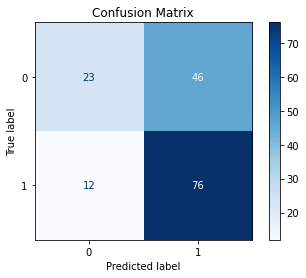

In [84]:
#подготовка предсказаний модели
predictions_4 = model_lr_4.predict(X_test_4_fin)

#расчёт метрик
accuracy = accuracy_score(y_test_4, predictions_4)
recall = recall_score(y_test_4, predictions_4)
precision = precision_score(y_test_4, predictions_4)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

#построение матрицы ошибок
confusion_mat = confusion_matrix(y_test_4, predictions_4)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Комментарий**: По метрикам и матрице ошибок мы видим, что есть проблема с точностью модели: она часто дает ошибочное предсказание, что молоко будет вкусным (проблема с определением класса Positive (вкусно), много лишних FP), отсюда страдает метрика Precision. И эта ошибка первого ряда для фермера критичнее всего: лучше не купить корову вовсе, чем купить с невкусным молоком, пострадает стандарт качества.

Необходимо свести критичную ошибку к нулю: для этого мы изменим порог принадлежности к классам, повысив в первую очередь точность модели.

In [85]:
#создадим датафрейм с вероятностями принадлежности к классу 1 (вкусно)
probs_4 = model_lr_4.predict_proba(X_test_4_fin)[:, 1]

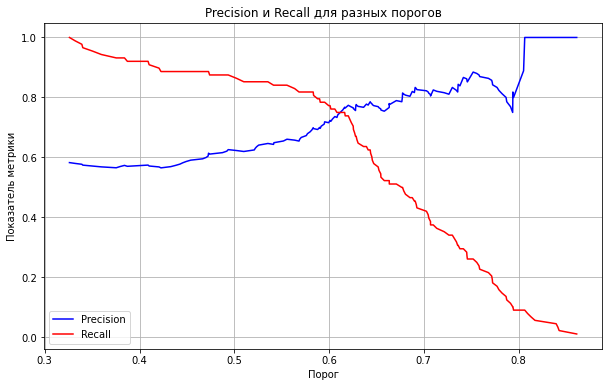

In [86]:
precision, recall, thresholds = precision_recall_curve(y_test_4, probs_4)

#построим график
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='r')
plt.xlabel('Порог')
plt.ylabel('Показатель метрики')
plt.title('Precision и Recall для разных порогов')
plt.legend()
plt.grid()
plt.show()

Recall: 0.05
Precision: 1.00


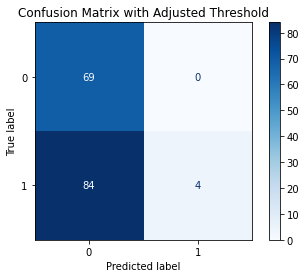

In [87]:
#попробуем установить новый порог, исходя из данных графика
threshold = 0.83
y_pred_adjusted = np.array([1 if prob > threshold else 0 for prob in probs_4])

#расчёт метрик
recall = recall_score(y_test_4, y_pred_adjusted)
precision = precision_score(y_test_4, y_pred_adjusted)

print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

#построение матрицы ошибок
confusion_mat = confusion_matrix(y_test_4, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix with Adjusted Threshold')
plt.show()

**Комментарий**: оптимальный порог, при котором у модели абсолютная точность - это 0.83. Сильно страдает полнота: recall упала до отметки 0.06, но надеемся, что такие жертвы себя оправдают :)

### Прогнозирование вкуса молока коров ЭкоФермы

Для того, чтобы предсказания были точнее, мы напишем функцию, которая отбирает предсказания в зависимости от установленного нами порога.

In [89]:
#готовим датасет cow_buy для анализа
#кодируем категориальные признаки 
cow_buy_cat_col_log = ['breed', 'breed_dad_bull', 'type_of_pasture', 'age', 'dad_name', 'spo_2']

ohe_taste = encoder_4.transform(cow_buy[cow_buy_cat_col_log])

#масштабируем количественные признаки
cow_buy_num_col_log = ['protein_gram', 'fat_proc', 'protein_proc', 'eke_2']

scl_taste = scaler_4.transform(cow_buy[cow_buy_num_col_log])

cow_buy_fin_log = np.concatenate([ohe_taste, scl_taste], axis=1)

In [90]:
def predict_with_threshold(model, X, threshold=0.83):
    #получаем вероятности принадлежности к классу 1
    probs = model.predict_proba(X)[:, 1]
    #применяем порог к вероятностям
    return np.array([1 if prob >= threshold else 0 for prob in probs])

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.

In [91]:
#создание прогнозов по вкусу
predictions_taste = predict_with_threshold(model_lr_4, cow_buy_fin_log, threshold=0.83)

In [92]:
#создание датафрейма с прогнозами и описаниями
predictions_taste_df = pd.DataFrame({
    'cow_ID': list(range(1, len(predictions_taste) + 1)),
    'taste_prediction': predictions_taste
})

predictions_taste_df = pd.concat([predictions_taste_df, descriptions.reset_index(drop=True)], axis=1)

#выводим датафрейм
display(predictions_taste_df)

,cow_ID,taste_prediction,breed,type_of_pasture,age,dad_name,fat_proc,protein_proc
0,1,0,Вис Бик Айдиал,холмистое,более_2_лет,Геркулес,3.58,3.076
1,2,0,Вис Бик Айдиал,равнинное,менее_2_лет,Буйный,3.54,3.081
2,3,0,РефлешнСоверинг,равнинное,более_2_лет,Барин,3.59,3.074
3,4,1,РефлешнСоверинг,холмистое,более_2_лет,Буйный,3.40,3.061
4,5,0,РефлешнСоверинг,равнинное,более_2_лет,Буйный,3.64,3.074
5,6,1,РефлешнСоверинг,равнинное,менее_2_лет,Геркулес,3.63,3.053
6,7,0,Вис Бик Айдиал,холмистое,более_2_лет,Геркулес,3.58,3.076
7,8,0,Вис Бик Айдиал,равнинное,более_2_лет,Буйный,3.57,3.079
8,9,0,РефлешнСоверинг,равнинное,более_2_лет,Барин,3.59,3.074
9,10,0,РефлешнСоверинг,холмистое,менее_2_лет,Буйный,3.40,3.079


In [93]:
predictions_taste_df.loc[(predictions_taste_df['taste_prediction']==1)]

,cow_ID,taste_prediction,breed,type_of_pasture,age,dad_name,fat_proc,protein_proc
3,4,1,РефлешнСоверинг,холмистое,более_2_лет,Буйный,3.40,3.061
5,6,1,РефлешнСоверинг,равнинное,менее_2_лет,Геркулес,3.63,3.053
10,11,1,Вис Бик Айдиал,холмистое,более_2_лет,Соловчик,3.73,3.055
12,13,1,Вис Бик Айдиал,холмистое,более_2_лет,Геркулес,3.68,3.046
15,16,1,РефлешнСоверинг,холмистое,более_2_лет,Буйный,3.40,3.065
17,18,1,РефлешнСоверинг,равнинное,менее_2_лет,Геркулес,3.77,3.053


**Вывод**: Идеальные коровы среди представленных Экофермой всё же найдены! Так как по показателю удоя подходят все коровы, то нам важно было определить среди них тех, у которых подходит вкус молока. Таких коров 6, с ID 4, 6, 11, 13, 16 и 18.

## Итоговые выводы

### Прогнозы по вкусу молока и удою у коров Экофермы

В датафрейм с коровами Экофермы, покупку которых рассматривает фермер, мы добавим получившиеся у нас прогнозы.

In [95]:
cow_buy.insert(0, 'cow_ID', predictions_yield_df['cow_ID']) 
cow_buy.insert(1, 'taste_prediction', predictions_taste_df['taste_prediction']) 
cow_buy.insert(2, 'yield_predictions', predictions_yield_df['yield_prediction']) 
cow_buy

,cow_ID,taste_prediction,yield_predictions,breed,type_of_pasture,breed_dad_bull,dad_name,fat_proc,protein_proc,age,eke,eke_2,spo,spo_2,protein_gram
0,1,0,6492.076132,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
1,2,0,6560.022916,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,0.958744,True,2019.947532
2,3,0,6453.163879,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
3,4,1,6476.892874,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
4,5,0,6473.495361,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
5,6,1,6664.000089,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,0.958744,True,2019.947532
6,7,0,6492.076132,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
7,8,0,6413.961007,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
8,9,0,6453.163879,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,0.958744,True,2019.947532
9,10,0,6626.903669,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,0.958744,True,2019.947532


### Отбор коров

По запросу фермера по показателю удоя (более 6000 кг в год) подходят все коровы. По показателю вкуса молока вкус молока подходит 6 коров, с ID 4, 6, 11, 13, 16 и 18. В связи с этим с минимальным риском фермер может позволить купить себе 6 коров: при покупке других высока вероятность получить невкусное молоко, пусть и при хорошем удое.

**Рекомендации, которые можно дать на основе этих данных**: рассматривать к покупке коров с ID 4, 6, 11, 13, 16 и 18. При покупке также стоит обязательно уточнить показатели ЭКЕ, СПО и сырого протеина, так как они могут отличаться от тех, что использовала модель при прогнозировании!

### Выводы о работе моделей

**Модели линейной регрессии**. 
- Модель №1: для обучения модели использовались параметры, которые имеют прямую линейную зависимость с Удоем: возраст коровы, жирность молока, количества белка, тип пастбища, ЭКЕ, СПО, порода;
- Модель №2: для обучения модели были обновлены параметры ЭКЕ, СПО, для корректной работы была убрана нелинейность зависимости между этими параметрами и Удоем;
- Модель №3: для обучения был добавлен параметр Имя Папы, взятый из датасета dad_name. 

*Итоговые метрики*:
- Модель №1: R² = 0.75, распределение остатков неслучайно, есть чередование низкой и высокой дисперсии остатков
- Модель №2: R² = 0.79, распределение остатков неслучайно, есть чередование низкой и высокой дисперсии остатков
- Модель №3: R² = 0.82, остатки распределены случайно.

По данным показателям очевидно, что модель №3 наиболее корректна в работе. Также она наиболее корректна и по показателям MSE, MAE, RMSE.

**Модель логистической регрессии**. 

Метрики моделей классификации в анализе рисков или экономических расчётов играют важную роль. Среди значимых можно отметить следующие, их мы и использовали в анализе:
1. Accuracy: это доля правильно классифицированных целевых признаков среди всех. Важна, когда классы сбалансированы.
2. Precision: метрика для оценки точности присваивания каласса Positive, то есть пособность модели избегать ложных срабатываний, её точность. Такая метрика нужна, когда ложные положительные прогнозы стоят больших денег, как, например, в нашем случае с покупкой коров. 
3. Recall: обратная precision метрика, способность модели корректно идентифицировать положительные признаки, полнота "обнаружения" Positive. Такая метрика важна, наоборот, где дорого обойдется пропуск положительного случая.

Для улучшения качества работы модели логистической регрессии в этом случае мы использовали грамотное выстраивание порога классификации: нам была важна точность модели (определение тех коров, у которых точно вкусное молоко), поэтому сделали упор на максимальное улучшение метрики precision. Вероятно, результаты модели можно улучшить, если обнаружатся новые параметры, более точно влияющие на предсказание вкуса молока. 